#📌 Extracción

In [133]:
import pandas as pd

# URL del archivo JSON en GitHub (raw)
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"


df = pd.read_json(url)
df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [134]:
print("Dimensiones del dataset:", df.shape)

Dimensiones del dataset: (7267, 6)


In [135]:
# Ver información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [136]:
# Verificar los tipos de datos de cada columna
print("\nTipos de datos:")
print(df.dtypes)



Tipos de datos:
customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object


In [137]:
# Verificar si hay valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64


#🔧 Transformación

### Comprobación de incoherencias en los datos

In [138]:
import pandas as pd

# 1. Aplanar los diccionarios principales

df_flat = pd.concat([
    df[['customerID', 'Churn']],
    df["customer"].apply(pd.Series),   # Expande los datos de customer
    df["phone"].apply(pd.Series),      # Expande los datos de phone
    df["internet"].apply(pd.Series),   # Expande los datos de internet
    df["account"].apply(pd.Series)     # Expande los datos de account
], axis=1)

# 2. Aplanar el subdiccionario "charges" dentro de account
charges = df_flat["Charges"].apply(pd.Series)

# 3. Unir las columnas de charges al dataset y eliminar la columna original
df_flat = pd.concat([df_flat.drop(columns=["Charges"]), charges], axis=1)

# 4. Reemplazar df con la versión aplanada
df = df_flat.copy()

# 5. Verificar estructura final

print("Dimensiones del dataset:", df.shape)
print("\nColumnas disponibles:")
print(df.columns.tolist())

Dimensiones del dataset: (7267, 21)

Columnas disponibles:
['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Monthly', 'Total']


In [139]:
df.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [140]:
# 2. Duplicados

duplicados = df.duplicated().sum()
print(f"Filas duplicadas: {duplicados}\n")

Filas duplicadas: 0



In [141]:
# Eliminamos valores duplicados
df = df.drop_duplicates()
print("Filas después de eliminar duplicados:", df.shape[0])


Filas después de eliminar duplicados: 7267


In [142]:
# Revisamos tipos de datos
print(" Tipos de datos iniciales:")
print(df.dtypes)
print("\n")


 Tipos de datos iniciales:
customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Monthly             float64
Total                object
dtype: object




In [143]:
# Convertir Total a float (por si había valores de texto)
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')


In [144]:
# Revisar si hay valores nulos después de la conversión
print("Valores nulos en Total:", df['Total'].isnull().sum())

Valores nulos en Total: 11


In [145]:
# Eliminar filas con Total nulo
df = df.dropna(subset=['Total'])
print("Filas después de eliminar nulos en Total:", df.shape[0])


Filas después de eliminar nulos en Total: 7256


In [146]:
# Revisamos tipos de datos
print(" Tipos de datos iniciales:")
print(df.dtypes)
print("\n")

 Tipos de datos iniciales:
customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Monthly             float64
Total               float64
dtype: object




#📊 Carga y análisis

### Crear la columna "Cuentas_Diarias".

In [147]:
# Crear columna "Cuentas_Diarias" = Monthly / 30
df['Cuentas_Diarias'] = df['Monthly'] / 30

# Revisar las primeras filas
df[['Monthly', 'Cuentas_Diarias']].head()


,Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


 ### Estandarización y transformación de datos (opcional)

In [148]:
df['Churn'].isna().sum()


np.int64(0)

In [149]:
# Lista de columnas binarias
binarias = [
    'Churn','Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling'
]

# Transformar Yes/No a 1/0 y limpiar espacios/mayúsculas
for col in binarias:
    df[col] = df[col].str.strip().str.capitalize()   # eliminar espacios y normalizar
    df[col] = df[col].map({'Yes': 1, 'No': 0})
# Revisar primeras filas para confirmar
df[binarias].head()


,Churn,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling
0,0.0,1,1,1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1
1,0.0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,1.0,0,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
3,1.0,1,0,1,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1
4,1.0,1,0,1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1


In [150]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,Cuentas_Diarias
0,0002-ORFBO,0.0,Female,0,1,1,9,1,0.0,DSL,...,0.0,1.0,1.0,0.0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0.0,Male,0,0,0,9,1,1.0,DSL,...,0.0,0.0,0.0,1.0,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,0.0,Fiber optic,...,1.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1.0,Male,1,1,0,13,1,0.0,Fiber optic,...,1.0,0.0,1.0,1.0,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,0.0,Fiber optic,...,0.0,1.0,1.0,0.0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


### Análisis Descriptivo

In [151]:
# Estadísticas descriptivas de todas las columnas numéricas
df.describe()


,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Monthly,Total,Cuentas_Diarias
count,7032.000000,7256.0000,7256.000000,7256.000000,7256.000000,7256.000000,6551.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,7256.000000,7256.000000,7256.000000,7256.000000
mean,0.265785,0.1629,0.483600,0.299063,32.395535,0.902839,0.467257,0.365077,0.440063,0.437775,0.369653,0.490407,0.495511,0.593716,64.755423,2280.634213,2.158514
std,0.441782,0.3693,0.499765,0.457879,24.558067,0.296197,0.498965,0.481494,0.496438,0.496157,0.482753,0.499952,0.500024,0.491173,30.125739,2268.632997,1.004191
min,0.000000,0.0000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.0000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.450000,400.225000,1.181667
50%,0.000000,0.0000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1391.000000,2.343333
75%,1.000000,0.0000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.900000,3785.300000,2.996667
max,1.000000,1.0000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


### Distribución de evasión

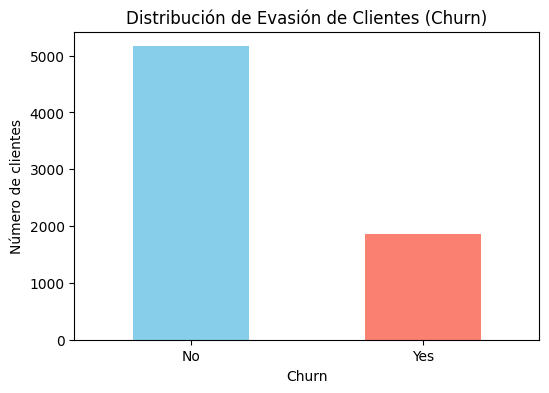

In [155]:
import matplotlib.pyplot as plt

# Contar la cantidad de clientes por estado de Churn
churn_counts = df['Churn'].value_counts()

# Mapear los índices 0/1 a No/Yes para mostrar en la gráfica
churn_counts.index = churn_counts.index.map({0: 'No', 1: 'Yes'})

# Crear gráfico de barras
plt.figure(figsize=(6,4))
churn_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribución de Evasión de Clientes (Churn)')
plt.xlabel('Churn')
plt.ylabel('Número de clientes')
plt.xticks(rotation=0)
plt.show()


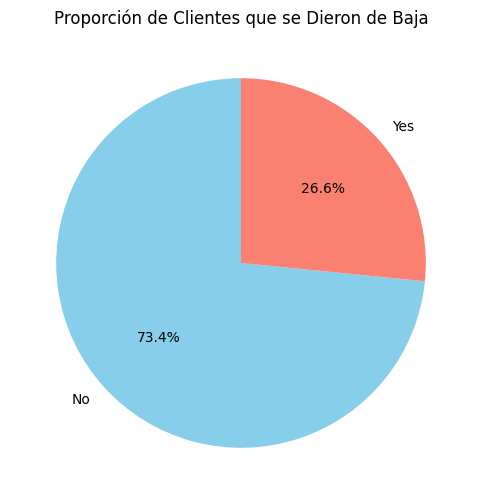

In [154]:
# Gráfico de pastel

# Mapear 1/0 a Yes/No para el gráfico
churn_labels = df['Churn'].map({1: 'Yes', 0: 'No'})
churn_counts = churn_labels.value_counts()

plt.figure(figsize=(6,6))
churn_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90)
plt.title('Proporción de Clientes que se Dieron de Baja')
plt.ylabel('')  # elimina la etiqueta del eje y
plt.show()

### Recuento de evasión por variables categóricas

In [153]:
# Lista de variables categóricas que queremos analizar
categoricas = ['gender', 'Contract', 'PaymentMethod', 'InternetService', 'PhoneService']

# Calcular la proporción de Churn por cada categoría
for col in categoricas:
    print(f"\nDistribución de Churn por {col}:")
    display(df.groupby(col)['Churn'].mean().sort_values(ascending=False))



Distribución de Churn por gender:


,Churn
gender,
Female,0.269595
Male,0.262046



Distribución de Churn por Contract:


,Churn
Contract,
Month-to-month,0.427097
One year,0.112772
Two year,0.028487



Distribución de Churn por PaymentMethod:


,Churn
PaymentMethod,
Electronic check,0.452854
Mailed check,0.192020
Bank transfer (automatic),0.167315
Credit card (automatic),0.152531



Distribución de Churn por InternetService:


,Churn
InternetService,
Fiber optic,0.418928
DSL,0.189983
No,0.074342



Distribución de Churn por PhoneService:


,Churn
PhoneService,
1,0.267475
0,0.250000


/tmp/ipython-input-3098652492.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='Churn', data=df, ci=None, palette='pastel')
/tmp/ipython-input-3098652492.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=df, ci=None, palette='pastel')


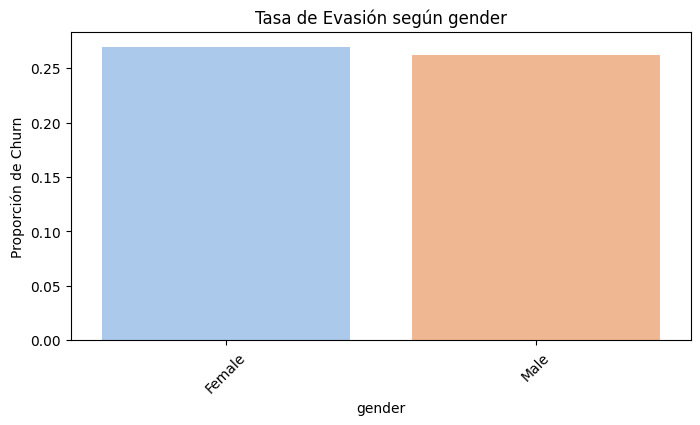

/tmp/ipython-input-3098652492.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='Churn', data=df, ci=None, palette='pastel')
/tmp/ipython-input-3098652492.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=df, ci=None, palette='pastel')


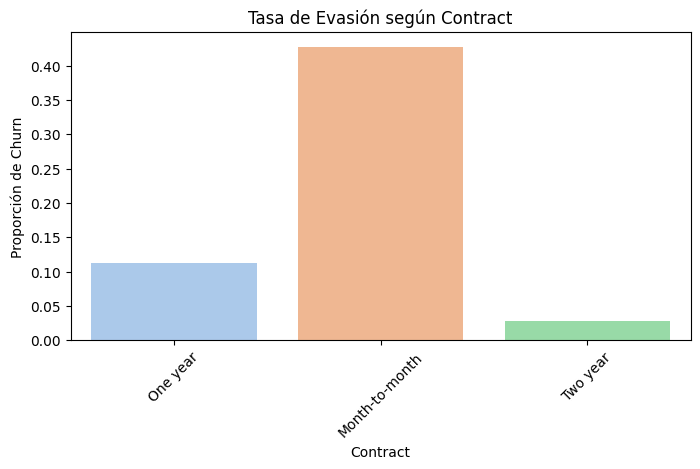

/tmp/ipython-input-3098652492.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='Churn', data=df, ci=None, palette='pastel')
/tmp/ipython-input-3098652492.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=df, ci=None, palette='pastel')


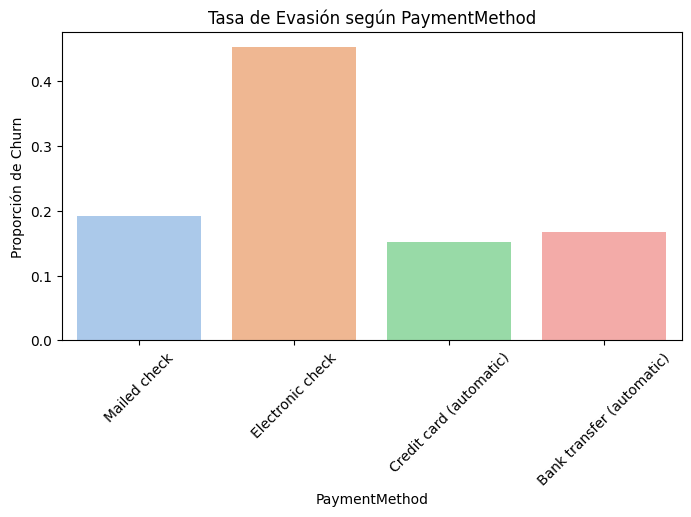

/tmp/ipython-input-3098652492.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='Churn', data=df, ci=None, palette='pastel')
/tmp/ipython-input-3098652492.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=df, ci=None, palette='pastel')


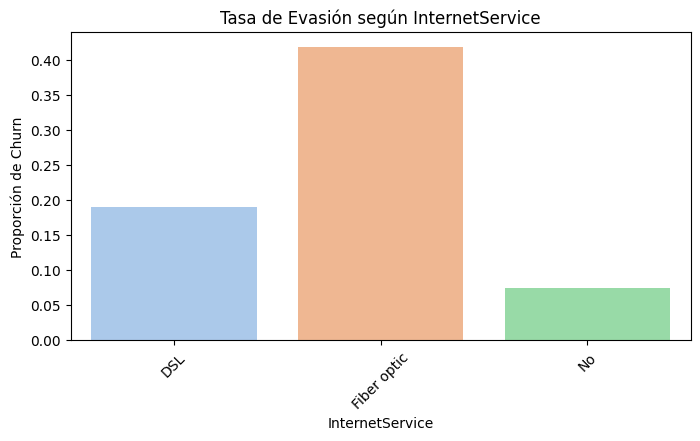

/tmp/ipython-input-3098652492.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='Churn', data=df, ci=None, palette='pastel')
/tmp/ipython-input-3098652492.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=df, ci=None, palette='pastel')


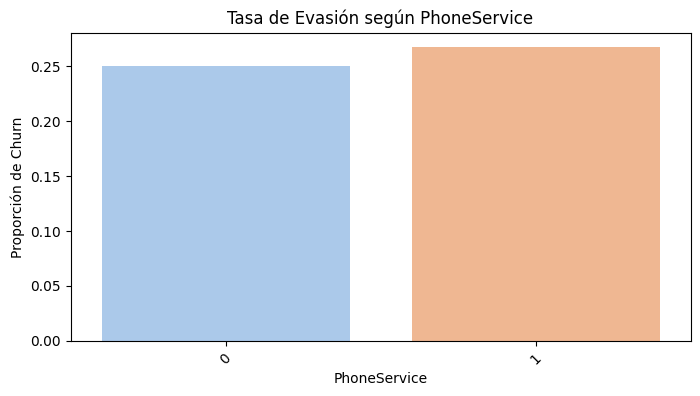

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in categoricas:
    plt.figure(figsize=(8,4))
    sns.barplot(x=col, y='Churn', data=df, ci=None, palette='pastel')
    plt.title(f'Tasa de Evasión según {col}')
    plt.ylabel('Proporción de Churn')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.show()


### Conteo de evasión por variables numéricas

In [158]:
# Variables numéricas a analizar
numericas = ['tenure', 'Monthly', 'Total', 'Cuentas_Diarias']

# Estadísticas descriptivas por Churn
df.groupby('Churn')[numericas].describe()


tenure                                                    Monthly  \
        count       mean        std  min   25%   50%   75%   max   count   
Churn                                                                      
0.0    5163.0  37.650010  24.076940  1.0  15.0  38.0  61.0  72.0  5163.0   
1.0    1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0  1869.0   

                  ...     Total          Cuentas_Diarias                      \
            mean  ...       75%      max           count      mean       std   
Churn             ...                                                          
0.0    61.307408  ...  4264.125  8672.45          5163.0  2.043580  1.036485   
1.0    74.441332  ...  2331.300  8684.80          1869.0  2.481378  0.822202   

                                                         
            min       25%       50%       75%       max  
Churn                                                    
0.0    0.608333  0.836667  2.148333  2.949167  3.958333  
1.0    0.628333  1.871667  2.655000  3.140000  3.945000  

[2 rows x 32 columns]

Visualización: boxplot

/tmp/ipython-input-3846912152.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette=['skyblue', 'salmon'])


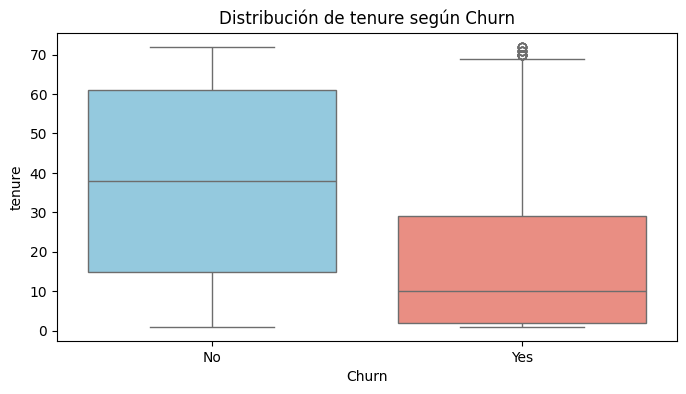

/tmp/ipython-input-3846912152.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette=['skyblue', 'salmon'])


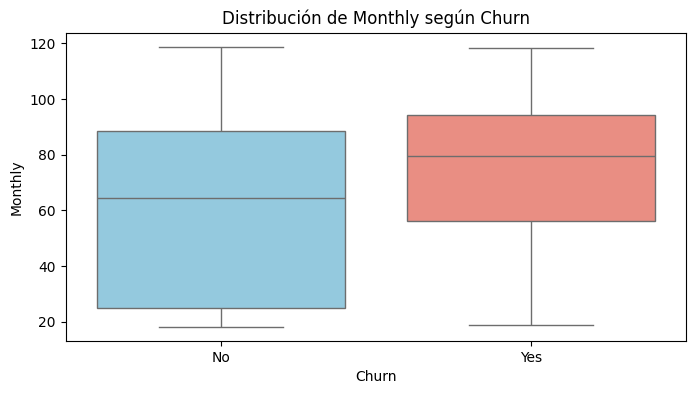

/tmp/ipython-input-3846912152.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette=['skyblue', 'salmon'])


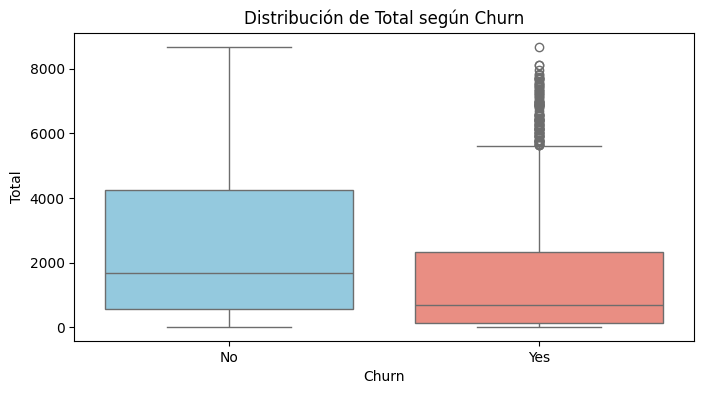

/tmp/ipython-input-3846912152.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette=['skyblue', 'salmon'])


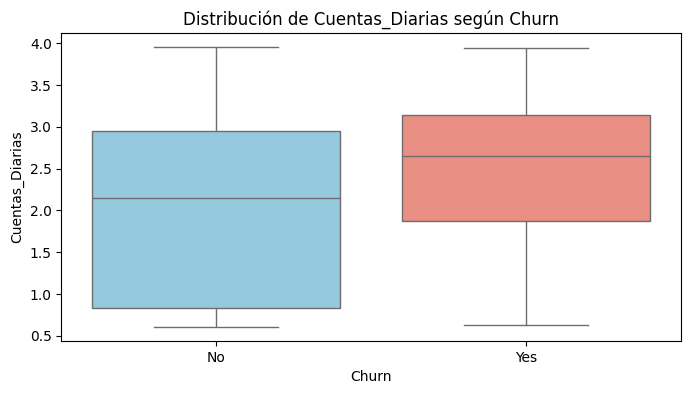

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in numericas:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='Churn', y=col, data=df, palette=['skyblue', 'salmon'])
    plt.xticks([0,1], ['No', 'Yes'])  # etiquetas más claras
    plt.title(f'Distribución de {col} según Churn')
    plt.show()


Visualización: histograma o KDE

/tmp/ipython-input-4216962341.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Churn']==0][col], label='No', shade=True, color='skyblue')
/tmp/ipython-input-4216962341.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Churn']==1][col], label='Yes', shade=True, color='salmon')


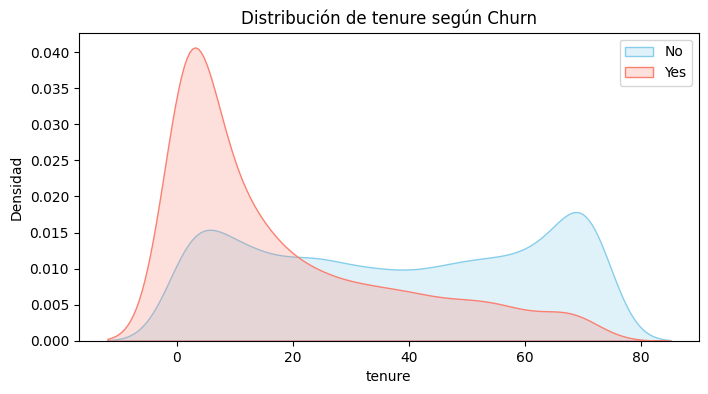

/tmp/ipython-input-4216962341.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Churn']==0][col], label='No', shade=True, color='skyblue')
/tmp/ipython-input-4216962341.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Churn']==1][col], label='Yes', shade=True, color='salmon')


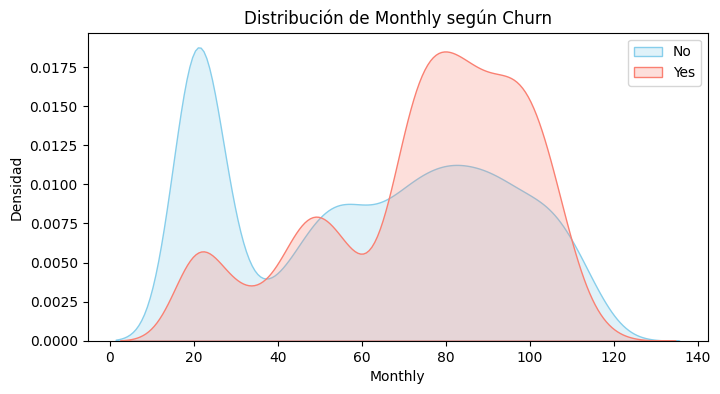

/tmp/ipython-input-4216962341.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Churn']==0][col], label='No', shade=True, color='skyblue')
/tmp/ipython-input-4216962341.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Churn']==1][col], label='Yes', shade=True, color='salmon')


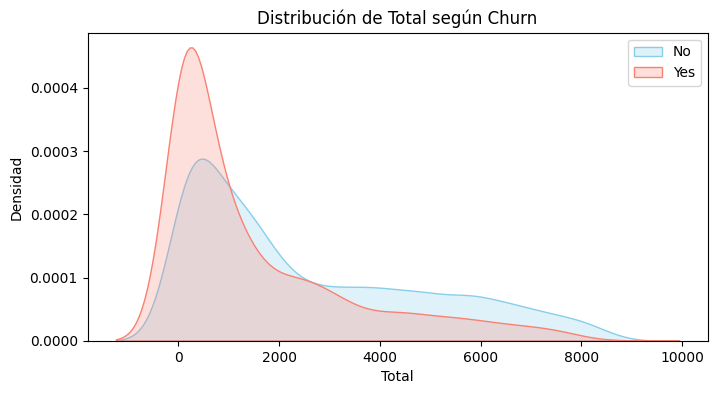

/tmp/ipython-input-4216962341.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Churn']==0][col], label='No', shade=True, color='skyblue')
/tmp/ipython-input-4216962341.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Churn']==1][col], label='Yes', shade=True, color='salmon')


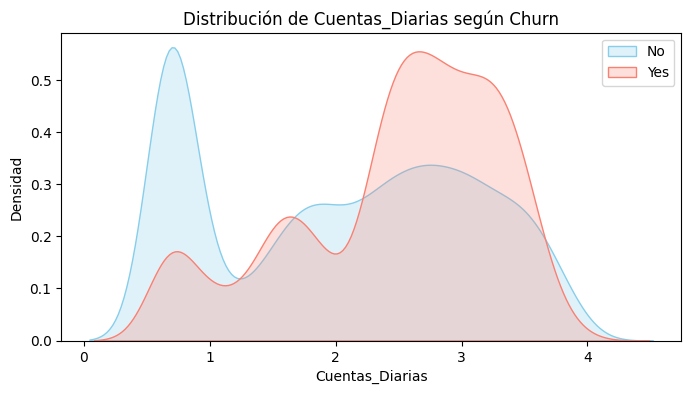

In [160]:
for col in numericas:
    plt.figure(figsize=(8,4))
    sns.kdeplot(df[df['Churn']==0][col], label='No', shade=True, color='skyblue')
    sns.kdeplot(df[df['Churn']==1][col], label='Yes', shade=True, color='salmon')
    plt.title(f'Distribución de {col} según Churn')
    plt.xlabel(col)
    plt.ylabel('Densidad')
    plt.legend()
    plt.show()


#📄Informe final

## Análisis de Evasión de Clientes - Telecom X

**Objetivo del análisis:**  
Identificar los factores que influyen en la **evasión de clientes (Churn)** de Telecom X, utilizando datos de clientes para generar insights que permitan reducir la cancelación de servicios.

**Problema:**  
Telecom X enfrenta una alta tasa de cancelaciones. Comprender qué variables y patrones están asociados con el Churn permitirá implementar estrategias de retención más efectivas.






# Limpieza y Procesamiento de Datos

**Pasos realizados:**
1. Importación de datos desde la API en formato JSON.
2. Conversión de los datos a un DataFrame de Pandas.
3. Aplanado de columnas con diccionarios anidados (`customer`, `phone`, `internet`, `account`, `charges`).
4. Conversión de columnas numéricas (`Total`) a tipo `float`.
5. Identificación y manejo de valores nulos y filas duplicadas.
6. Estandarización de columnas binarias (`Yes/No` a `1/0`) para:
   - `Churn`, `Partner`, `Dependents`, `PhoneService`, `MultipleLines`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`, `PaperlessBilling`.
7. Creación de la columna `Cuentas_Diarias` a partir de la facturación mensual (`Monthly / 30`).
8. Normalización de nombres de columnas y limpieza de espacios para mejorar la legibilidad.

# Análisis Exploratorio de Datos

**Distribución general de Churn:**
- Proporción de clientes que permanecen vs. los que cancelan.
- Visualización: gráfico de pastel y barras.

In [ ]:
churn_labels = df['Churn'].map({1: 'Yes', 0: 'No'})
churn_counts = churn_labels.value_counts()

plt.figure(figsize=(6,6))
churn_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90)
plt.title('Proporción de Clientes que se Dieron de Baja')
plt.ylabel('')
plt.show()

**Distribución por variables categóricas:**
- Comparación de tasa de Churn según género, tipo de contrato, método de pago, servicios contratados.
- Visualización: gráficos de barras por categoría.

In [ ]:
categoricas = ['gender', 'Contract', 'PaymentMethod', 'InternetService', 'PhoneService']

for col in categoricas:
    plt.figure(figsize=(8,4))
    sns.barplot(x=col, y='Churn', data=df, ci=None, palette='pastel')
    plt.title(f'Tasa de Evasión según {col}')
    plt.ylabel('Proporción de Churn')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.show()


**Distribución de variables numéricas:**
- Comparación de `Total`, `Monthly`, `tenure`, `Cuentas_Diarias` entre clientes que cancelaron y los que no.
- Visualización: boxplots y densidad (KDE).


In [ ]:
numericas = ['tenure', 'Monthly', 'Total', 'Cuentas_Diarias']

for col in numericas:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='Churn', y=col, data=df, palette=['skyblue', 'salmon'])
    plt.xticks([0,1], ['No', 'Yes'])
    plt.title(f'Distribución de {col} según Churn')
    plt.show()


# Conclusiones e Insights

1. La proporción de clientes que cancelan es significativa, mostrando la necesidad de acciones de retención.
2. Variables categóricas como tipo de contrato y método de pago muestran diferencias claras en la tasa de Churn.
3. Clientes con menor tiempo de contrato (`tenure`) o menor gasto mensual (`Monthly`) tienden a cancelar más.
4. Algunos servicios adicionales (OnlineSecurity, TechSupport) pueden estar asociados a mayor retención.
5. La columna `Cuentas_Diarias` permite entender mejor el comportamiento financiero diario de los clientes.


# Recomendaciones

1. Implementar estrategias de fidelización para clientes con contratos cortos y bajo gasto mensual.
2. Ofrecer servicios adicionales atractivos que aumenten la retención (ej. seguridad online, soporte técnico).
3. Revisar métodos de pago y ofrecer incentivos a clientes con mayor riesgo de cancelación.
